In [28]:
import pandas as pd

# Try reading the file with a different encoding
df = pd.read_csv('/content/Bird Strikes data.csv', encoding='latin1')

# Display the first few rows of the dataset
print(df.head())
df.shape
df.columns

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight        FlightDate  \
0                             859         Engine Shut Down  23-11-2000 00:00   
1                             424                      NaN  25-07-2001 00:00   
2                   

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [13]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Check the shape of the dataset after dropping missing values
print(df.shape)

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [39]:
# Convert date column to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract year and month from the incident_date
df['year'] = df['FlightDate'].dt.year
df['month'] = df['FlightDate'].dt.month
df['year_month'] = df['FlightDate'].dt.to_period('M')

# Display the first few rows of the dataset with the new columns
print(df.head())
df.columns

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                      NaN 2001-07-25   
2                             261        

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'year', 'month', 'year_month'],
      dtype='object')

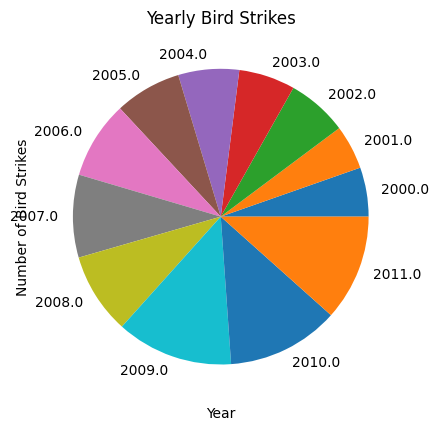

In [26]:
import matplotlib.pyplot as plt

# Group by year and calculate the number of bird strikes
yearly_strikes = df.groupby('year').size()

# Plot the yearly bird strikes
yearly_strikes.plot(kind='pie', title='Yearly Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()


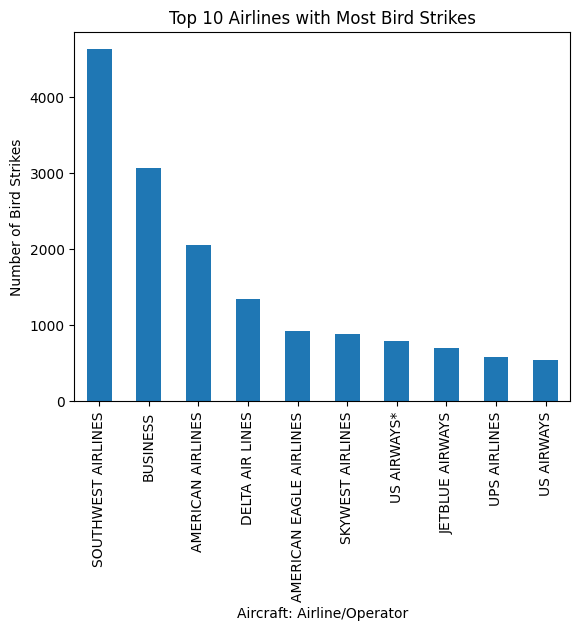

In [29]:
# Group by airline and calculate the number of bird strikes
airline_strikes = df['Aircraft: Airline/Operator'].value_counts().head(10)

# Plot the top 10 airlines with the most bird strikes
airline_strikes.plot(kind='bar', title='Top 10 Airlines with Most Bird Strikes')
plt.xlabel('Aircraft: Airline/Operator')
plt.ylabel('Number of Bird Strikes')
plt.show()


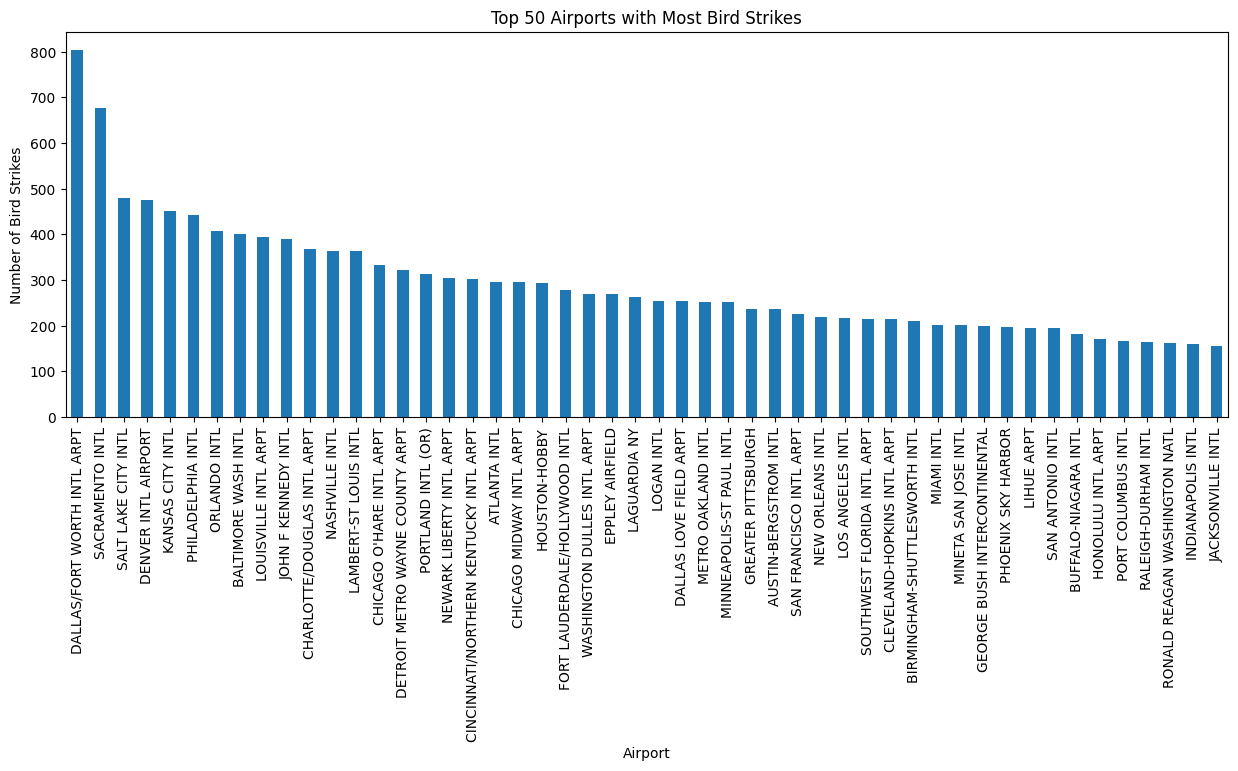

In [36]:
# Group by airport and calculate the number of bird strikes
airport_strikes = df['Airport: Name'].value_counts().head(50)

# Plot the top 50 airports with the most bird strikes
airport_strikes.plot(kind='bar', title='Top 50 Airports with Most Bird Strikes', figsize=(15, 5))
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.show()


In [49]:
# Rename columns
df.rename(columns={'Cost: Total $': 'cost'}, inplace=True)

print(df)
df.columns


       Record ID Aircraft: Type                    Airport: Name Altitude bin  \
0         202152       Airplane                     LAGUARDIA NY    > 1000 ft   
1         208159       Airplane      DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2         207601       Airplane                LAKEFRONT AIRPORT    < 1000 ft   
3         215953       Airplane              SEATTLE-TACOMA INTL    < 1000 ft   
4         219878       Airplane                     NORFOLK INTL    < 1000 ft   
...          ...            ...                              ...          ...   
25553     321151       Airplane                REDDING MUNICIPAL    > 1000 ft   
25554     319677       Airplane                     ORLANDO INTL    < 1000 ft   
25555     319680            NaN                              NaN          NaN   
25556     319679       Airplane  DETROIT METRO WAYNE COUNTY ARPT    < 1000 ft   
25557     319593       Airplane     ABRAHAM LINCOLN CAPITAL ARPT    < 1000 ft   

      Aircraft: Make/Model 

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'cost', 'Feet above ground',
       'Number of people injured', 'Is Aircraft Large?', 'year', 'month',
       'year_month'],
      dtype='object')

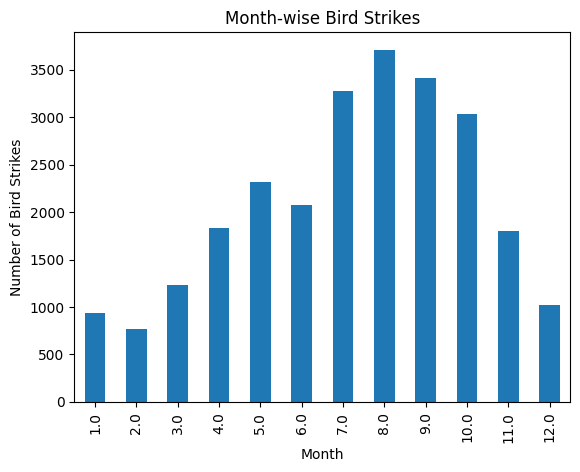

In [52]:
# Group by month and calculate the number of bird strikes
monthly_strikes = df.groupby('month').size()

# Plot the month-wise bird strikes
monthly_strikes.plot(kind='bar', title='Month-wise Bird Strikes')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.show()


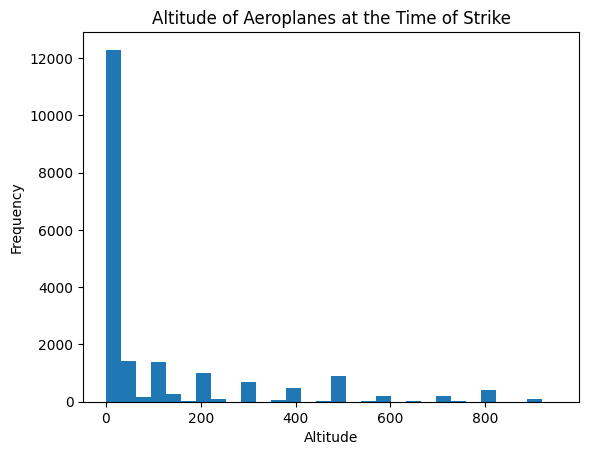

In [56]:
# Convert 'Feet above ground' to numeric, handling errors
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Plot the distribution of altitudes at the time of bird strikes
df['Feet above ground'].plot(kind='hist', title='Altitude of Aeroplanes at the Time of Strike', bins=30)
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

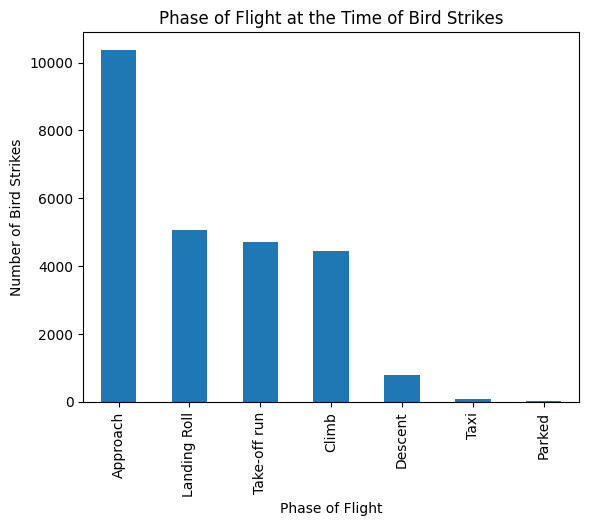

In [57]:
# Group by phase of flight and calculate the number of bird strikes
phase_strikes = df['When: Phase of flight'].value_counts()

# Plot the phase of flight at the time of bird strikes
phase_strikes.plot(kind='bar', title='Phase of Flight at the Time of Bird Strikes')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.show()
